# Mô tả DATA

+ CreditScore: Điểm tín dụng ảnh hưởng đến khả năng thanh toán và sự ổn định tài chính của khách hàng.

+ Geography: Các yếu tố văn hóa, kinh tế và chính trị của quốc gia ảnh hưởng đến quyết định của khách hàng.

+ Gender: Giới tính liên quan đến các sở thích, nhu cầu và lựa chọn tài chính của khách hàng.

+ Age: Tuổi ảnh hưởng đến sự ổn định công việc, tình hình tài chính và nhu cầu sử dụng sản phẩm.

+ Tenure: Thời gian đã ở trong ngân hàng phản ánh sự trung thành và hài lòng của khách hàng.

+ Balance: Số dư trong tài khoản cho thấy mức độ tài chính và hoạt động giao dịch của khách hàng.

+ NumOfProducts: Số lượng sản phẩm ngân hàng mà khách hàng sở hữu phản ánh mức độ tương tác và liên kết với ngân hàng.

+ HasCrCard: Việc có thẻ tín dụng ảnh hưởng đến sự tiện lợi và khả năng sử dụng dịch vụ của khách hàng.

+ IsActiveMember: Thành viên hoạt động phản ánh mức độ tương tác và cam kết của khách hàng.

+ EstimatedSalary: Mức lương ước tính ảnh hưởng đến khả năng thanh toán và sự ổn định tài chính của khách hàng.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Churn Model/Churn_Modelling.csv')
data.shape

(10000, 14)

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


## **EDA**

In [9]:
data['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


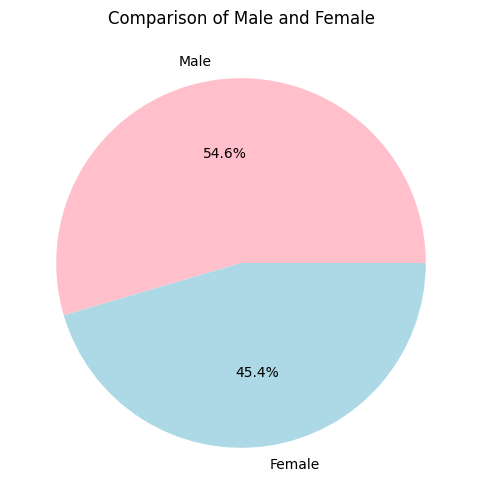

In [10]:
plt.figure(figsize=(8, 6))
plt.pie(data['Gender'].value_counts(),
        labels=data['Gender'].value_counts().index,
        autopct='%1.1f%%',
        colors=['pink', 'lightblue'])
plt.title('Comparison of Male and Female')
plt.show()

In [11]:
data['Age'].value_counts()

,count
Age,
37,478
38,477
35,474
36,456
34,447
...,...
84,2
88,1
82,1


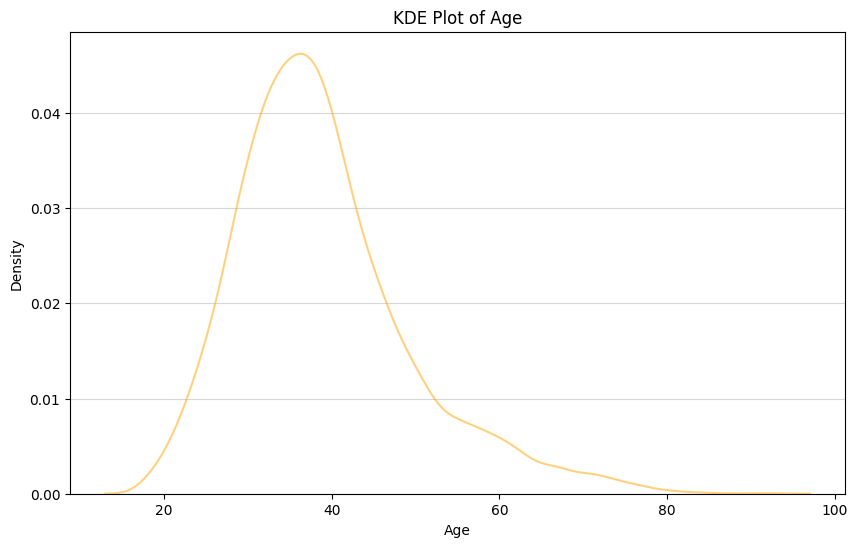

In [12]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Age'],
            color='orange',
            alpha=0.5)
plt.title('KDE Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.5)
plt.show()


In [13]:
data['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


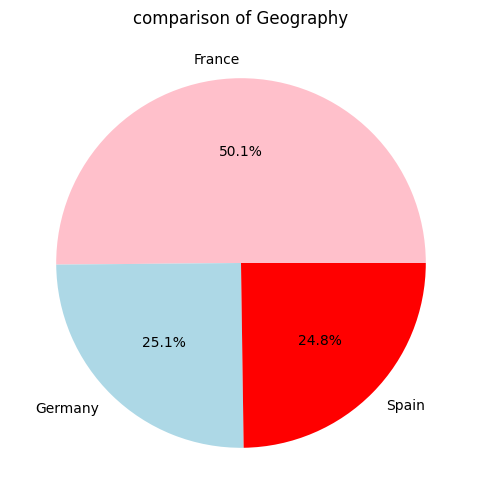

In [14]:
plt.figure(figsize=(8, 6))
plt.pie(data['Geography'].value_counts(),
        labels=data['Geography'].value_counts().index,
        autopct='%1.1f%%',
        colors=['pink', 'lightblue', 'red'])
plt.title('comparison of Geography')
plt.show()

In [15]:
data['HasCrCard'].value_counts()

,count
HasCrCard,
1,7055
0,2945


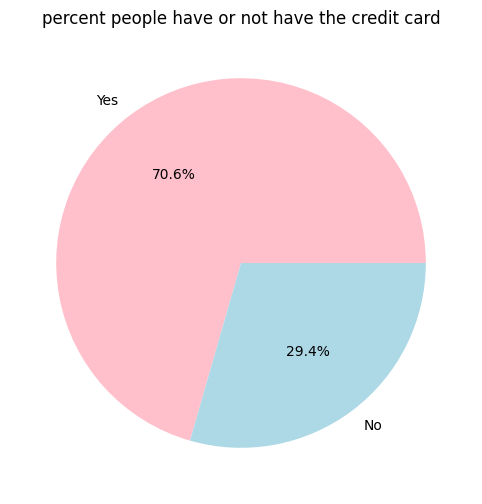

In [16]:

plt.figure(figsize=(8, 6))
plt.pie(data['HasCrCard'].value_counts(),
        labels=['Yes', 'No'],
        autopct='%1.1f%%',
        colors=['pink', 'lightblue'])
plt.title('percent people have or not have the credit card')
plt.show()

In [17]:
data['IsActiveMember'].value_counts()

,count
IsActiveMember,
1,5151
0,4849


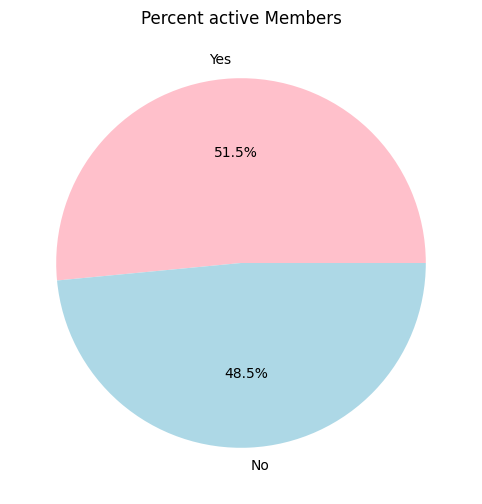

In [18]:

plt.figure(figsize=(8, 6))
plt.pie(data['IsActiveMember'].value_counts(),
        labels=['Yes','No'],
        autopct='%1.1f%%',
        colors=['pink', 'lightblue'])
plt.title('Percent active Members')
plt.show()

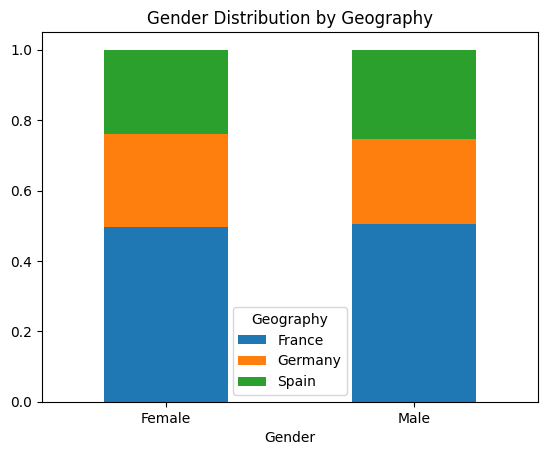

In [19]:
# comparison between Geography and Gender

Gender = pd.crosstab(data['Gender'],data['Geography'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xticks(rotation=0)
plt.title('Gender Distribution by Geography')
plt.xlabel('Gender')
plt.show()

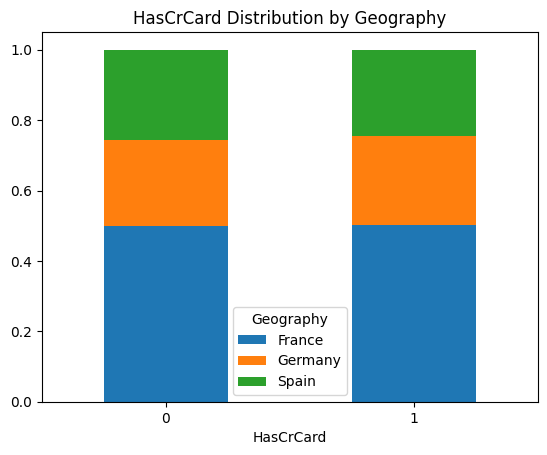

In [20]:
# comparison between geography and card holders

HasCrCard = pd.crosstab(data['HasCrCard'], data['Geography'])
HasCrCard.div(HasCrCard.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)

plt.xticks(rotation=0)
plt.title('HasCrCard Distribution by Geography')
plt.xlabel('HasCrCard')
plt.show()

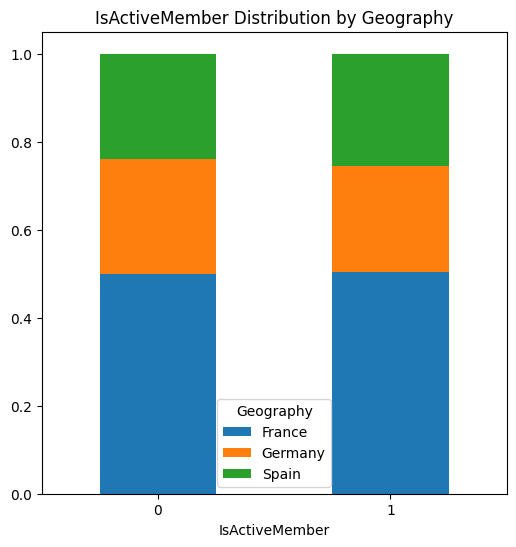

In [21]:
# comparison of active member in differnt geographies

IsActiveMember = pd.crosstab(data['IsActiveMember'], data['Geography'])
IsActiveMember.div(IsActiveMember.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                             stacked = True, figsize= (6, 6))

plt.xticks(rotation=0)
plt.title('IsActiveMember Distribution by Geography')
plt.xlabel('IsActiveMember')
plt.show()

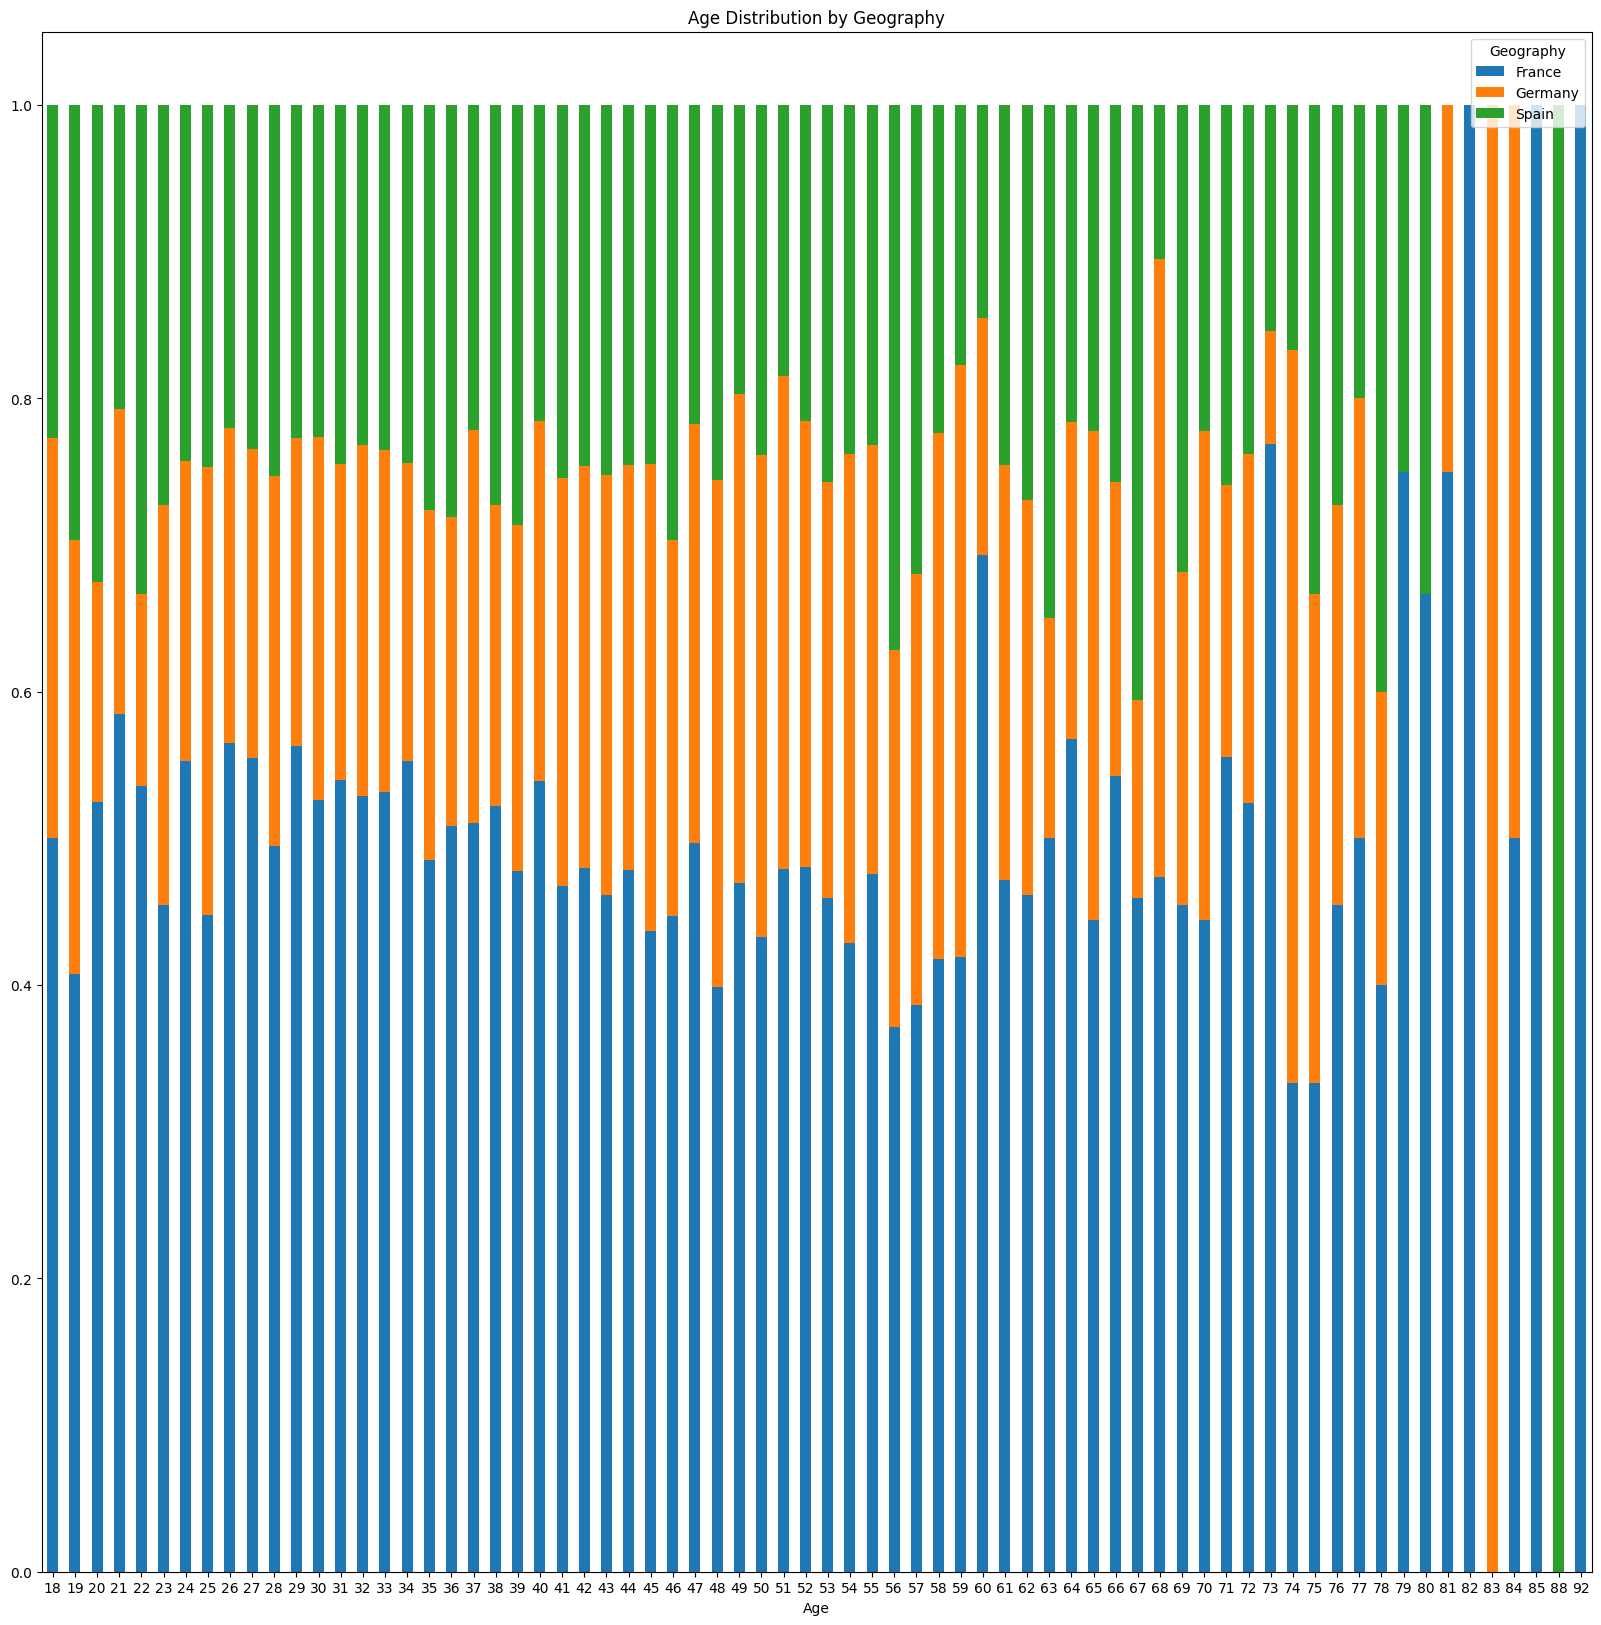

In [22]:
# comparing ages in different geographies

Age = pd.crosstab(data['Age'], data['Geography'])
Age.div(Age.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                           stacked = True, figsize = (20,20))

plt.xticks(rotation=0)
plt.title('Age Distribution by Geography')
plt.xlabel('Age')
plt.show()

In [23]:

# calculating total balance in france, germany and spain

total_france = data.Balance[data.Geography == 'France'].sum()
total_germany = data.Balance[data.Geography == 'Germany'].sum()
total_spain = data.Balance[data.Geography == 'Spain'].sum()

print("Total Balance in France :",total_france)
print("Total Balance in Germany :",total_germany)
print("Total Balance in Spain :",total_spain)

Total Balance in France : 311332479.49
Total Balance in Germany : 300402861.38
Total Balance in Spain : 153123552.01


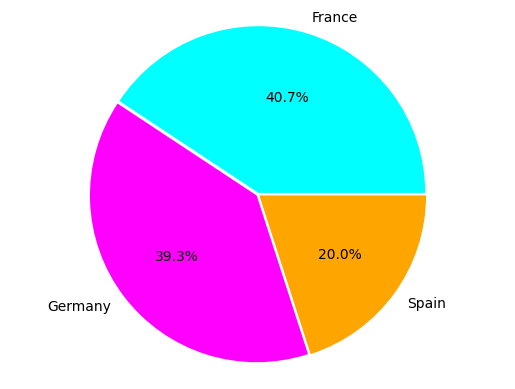

In [24]:
# plotting a pie chart

labels = 'France', 'Germany', 'Spain'
colors = ['cyan', 'magenta', 'orange']
sizes =  [total_france, total_germany, total_spain]
explode = [ 0.01, 0.01, 0.01]

plt.pie(sizes, colors = colors, labels = labels, explode = explode, shadow = False, autopct='%1.1f%%')

plt.axis('equal')
plt.show()

# **Data Preprocessing**

In [25]:
df = data.copy()

In [26]:
df = df.drop(['CustomerId', 'Surname', 'RowNumber'], axis = 1)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [27]:
df.shape

(10000, 11)

In [28]:
x = df.drop(['Exited'], axis = 1)
y = df['Exited']

print(x.shape)
print(y.shape)

(10000, 10)
(10000,)


In [29]:
# One Hot Encoding
x = pd.get_dummies(x)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False


In [30]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_scaler  = sc.fit_transform(x)

X_scaler = pd.DataFrame(X_scaler)
X_scaler.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.0,0.0,1.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,1.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.0,0.0,1.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,1.0,0.0,0.0,1.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,1.0,1.0,0.0


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaler, y, test_size = 0.2, random_state = 42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8000, 13)
(8000,)
(2000, 13)
(2000,)


# **Modelling**

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [34]:
Logistic_reg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=3)
tree=DecisionTreeClassifier()

## **Logistic Regression**

### Lý thuyết


- Là một thuật toán học máy thuộc loại phân loại (classification), thường được sử dụng để dự đoán xác suất của một sự kiện thuộc về một trong hai lớp (binary classification).

- Mặc dù có tên là "regression", Logistic Regression thực sự không dùng để giải các bài toán hồi quy, mà dùng để phân loại.

- Logistic Regression dựa trên mô hình hồi quy tuyến tính nhưng sử dụng hàm kích hoạt sigmoid (hoặc hàm logit) để biến đổi đầu ra từ giá trị liên tục thành xác suất trong khoảng từ 0 đến 1.

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

- Trong đó, $z = \mathbf{w}^T \mathbf{x} + b$ là tổng có trọng số của các biến đầu vào $\mathbf{x}$, $\mathbf{w}$ là các hệ số (trọng số) của mô hình, và $b$ là hệ số chặn (bias).

- Nếu xác suất lớn hơn 0.5, mô hình sẽ phân loại đầu vào vào lớp 1; ngược lại, vào lớp 0.
​


### Code

In [35]:
Logistic_reg.fit(x_train, y_train)
y_pred_log = Logistic_reg.predict(x_test)

In [36]:
print("Training Accuracy :", Logistic_reg.score(x_train, y_train))
print("Testing Accuaracy :", Logistic_reg.score(x_test, y_test))

Training Accuracy : 0.811875
Testing Accuaracy : 0.812


## **K-Nearest Neighbors**

### Lý thuyết



- **Xác định K giá trị lân cận (neighbors)**:
    - Khi một dữ liệu mới cần dự đoán, KNN tìm K điểm dữ liệu gần nhất với điểm đó từ tập dữ liệu huấn luyện.

- **Tính khoảng cách**:
    - Khoảng cách giữa điểm mới và các điểm trong tập dữ liệu có thể được tính bằng các phương pháp như:

   - **Khoảng cách Euclid** (Euclidean Distance):
   $$
   d(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}
   $$
   - **Khoảng cách Manhattan**, **Khoảng cách Minkowski**, v.v.

- **Phân loại**:
    - Sau khi xác định K láng giềng gần nhất, KNN thực hiện việc phân loại dựa trên đa số nhãn của các láng giềng này (majority vote).
   - Ví dụ: Nếu trong số K láng giềng gần nhất, phần lớn thuộc một lớp, thì dữ liệu mới sẽ được phân vào lớp đó.

- **Hồi quy**:
    - Trong bài toán hồi quy, KNN dự đoán giá trị liên tục bằng cách tính trung bình các giá trị của K láng giềng gần nhất.

- Tham số K:
    - **K** là tham số quan trọng trong KNN. Nếu K quá nhỏ (ví dụ: K = 1), mô hình có thể bị **overfitting**. Nếu K quá lớn, mô hình có thể bị **underfitting**.


### Code

In [37]:
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [38]:
print("Training Accuracy :", knn.score(x_train, y_train))
print("Testing Accuaracy :", knn.score(x_test, y_test))

Training Accuracy : 0.890625
Testing Accuaracy : 0.818


## **Decision Tree**

### Lý thuyết



**Decision Tree** (Cây Quyết Định) là một trong những thuật toán học máy phổ biến được sử dụng cho cả bài toán phân loại (classification) và hồi quy (regression). Đây là một mô hình trực quan dễ hiểu và dễ giải thích, giúp người dùng đưa ra quyết định dựa trên các điều kiện đã cho.

1. Định nghĩa:
Cây quyết định là một cấu trúc dạng cây, trong đó mỗi nút nội (internal node) đại diện cho một thuộc tính (feature) của dữ liệu, mỗi nhánh (branch) đại diện cho một giá trị của thuộc tính đó, và mỗi nút lá (leaf node) đại diện cho một nhãn lớp (class label) hoặc giá trị dự đoán (predicted value).

2. Cách thức hoạt động:
- **Chia dữ liệu**: Cây quyết định xây dựng mô hình bằng cách phân chia dữ liệu thành các nhóm dựa trên các thuộc tính. Mục tiêu là giảm thiểu độ không đồng nhất (impurity) trong mỗi nhóm. Các thuật toán phổ biến để tính toán độ không đồng nhất bao gồm:
  - **Entropy**: Được sử dụng trong thuật toán ID3 và C4.5.
  - **Gini Impurity**: Được sử dụng trong thuật toán CART.
  
- **Quyết định ngừng**: Quá trình phân chia tiếp tục cho đến khi một trong các điều kiện dừng đạt được, chẳng hạn như:
  - Tất cả các điểm dữ liệu trong một nút lá đều thuộc về một lớp.
  - Đã đạt được chiều sâu tối đa của cây.
  - Không còn thuộc tính nào để phân chia.

3. Ưu điểm:
- **Dễ hiểu và trực quan**: Cây quyết định có thể được trực quan hóa và dễ dàng giải thích cho người không có kiến thức chuyên sâu về thống kê hay học máy.
- **Không yêu cầu chuẩn hóa dữ liệu**: Không cần phải chuẩn hóa hoặc biến đổi dữ liệu trước khi sử dụng.
- **Có khả năng xử lý cả dữ liệu số và dữ liệu phân loại**.

4. Nhược điểm:
- **Dễ bị overfitting**: Cây quyết định có thể trở nên quá phức tạp và học quá kỹ các chi tiết của dữ liệu huấn luyện, dẫn đến khả năng tổng quát kém cho dữ liệu mới.
- **Nhạy cảm với biến đổi nhỏ trong dữ liệu**: Thay đổi nhỏ trong dữ liệu có thể dẫn đến thay đổi lớn trong cấu trúc cây.
- **Không hoạt động tốt với các dữ liệu có nhiều thuộc tính không liên quan**.

5. Ứng dụng:
Cây quyết định được sử dụng rộng rãi trong nhiều lĩnh vực, bao gồm:
- Phân loại bệnh nhân trong y học.
- Phân loại khách hàng trong marketing.
- Dự đoán kết quả trong thể thao.
- Ra quyết định trong các hệ thống khuyến nghị.

6. Kỹ thuật cải tiến:
- **Pruning** (cắt tỉa): Làm giảm kích thước của cây sau khi xây dựng để loại bỏ các nhánh không cần thiết và giảm overfitting.
- **Ensemble Methods**: Kết hợp nhiều cây quyết định để tạo ra mô hình mạnh mẽ hơn, chẳng hạn như Random Forest và Gradient Boosting.


### Code

In [39]:
tree.fit(x_train, y_train)
y_pred_tree= tree.predict(x_test)

print("Training Accuracy :", tree.score(x_train, y_train))
print("Testing Accuaracy :", tree.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuaracy : 0.781


## **Random Forest**


### Lý thuyết


- Là một phương pháp học máy thuộc nhóm mô hình ensemble, được sử dụng chủ yếu cho các tác vụ phân loại và hồi quy.
- Nó kết hợp nhiều mô hình đơn giản (thường là cây quyết định) để tạo ra một mô hình mạnh mẽ hơn, giúp tăng độ chính xác và ổn định. Dưới đây là các điểm chính về Random Forest và mối liên hệ của nó với bagging:

1. **Bagging (Bootstrap Aggregating)**:
   - **Lấy mẫu Bootstrap**: Một tập dữ liệu huấn luyện được lấy mẫu nhiều lần (có hoàn lại) để tạo ra nhiều tập con khác nhau.
   - **Huấn luyện mô hình song song**: Mỗi tập con được sử dụng để huấn luyện một mô hình độc lập (thường là cây quyết định).
   - **Tổng hợp kết quả**: Các dự đoán từ tất cả các mô hình được kết hợp lại để đưa ra kết quả cuối cùng, thường là bằng cách tính trung bình (cho hồi quy) hoặc lấy phiếu bầu (cho phân loại).

2. **Cấu Trúc của Random Forest**:
   - **Tạo nhiều cây quyết định**: Random Forest tạo ra một số lượng lớn cây quyết định và mỗi cây được xây dựng từ một tập con khác nhau của dữ liệu.
   - **Chọn biến ngẫu nhiên**: Trong mỗi lần phân nhánh của cây, một số lượng biến ngẫu nhiên được chọn để xác định phân nhánh, giúp tăng cường tính đa dạng giữa các cây.

3. **Ưu Điểm của Random Forest**:
   - **Độ chính xác cao**: Thông qua việc kết hợp nhiều mô hình, Random Forest thường đạt độ chính xác tốt hơn so với một cây quyết định đơn lẻ.
   - **Kháng với overfitting**: Với số lượng lớn cây và phương pháp tổng hợp, Random Forest có khả năng giảm thiểu hiện tượng overfitting.
   - **Khả năng xử lý dữ liệu thiếu**: Random Forest có thể hoạt động tốt ngay cả khi một số giá trị trong tập dữ liệu bị thiếu.

4. **Nhược Điểm**:
   - **Tốn tài nguyên tính toán**: Do cần huấn luyện nhiều cây, Random Forest có thể yêu cầu nhiều thời gian và tài nguyên tính toán hơn.
   - **Khó giải thích**: Kết quả từ mô hình Random Forest có thể khó giải thích hơn so với các mô hình đơn giản như cây quyết định.


### Code

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
# Khởi tạo mô hình Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf= rf.predict(x_test)


In [42]:
print("Training Accuracy :", rf.score(x_train, y_train))
print("Testing Accuaracy :", rf.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuaracy : 0.864


## Đánh giá

In [43]:
print("LogisticRegression:")
print(classification_report(y_test, y_pred_log))
accuracy_log = accuracy_score(y_test, y_pred_log)

print("\nK-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("\nDecisionTree")
print(classification_report(y_test, y_pred_tree))
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print("\Random Forest")
print(classification_report(y_test, y_pred_rf))
accuracy_rf = accuracy_score(y_test, y_pred_rf)

LogisticRegression:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.19      0.29       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1607
           1       0.55      0.39      0.46       393

    accuracy                           0.82      2000
   macro avg       0.71      0.66      0.67      2000
weighted avg       0.80      0.82      0.81      2000


DecisionTree
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1607
           1       0.45      0.50      0.47       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg      

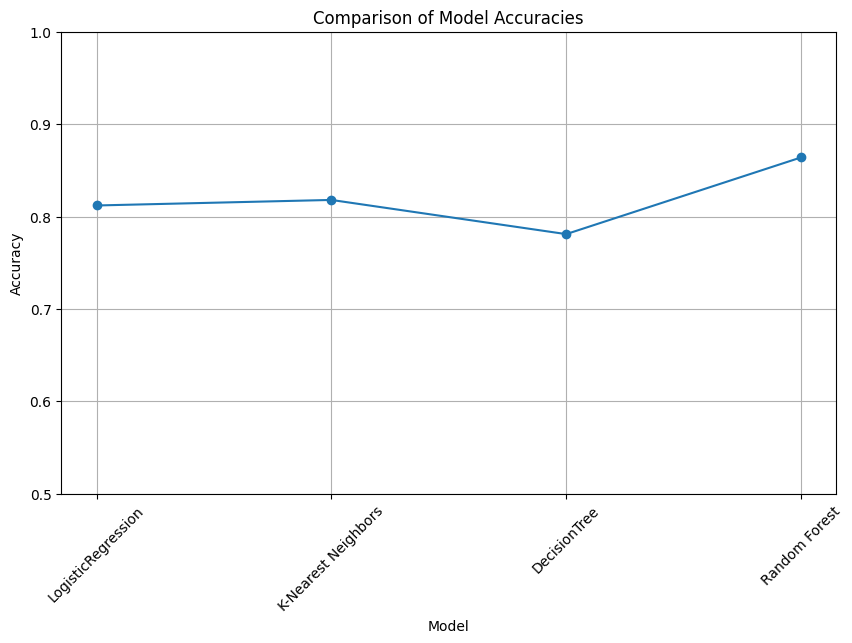

In [44]:
accuracy = [accuracy_log, accuracy_knn, accuracy_tree, accuracy_rf]

model_names = ["LogisticRegression", "K-Nearest Neighbors", "DecisionTree", "Random Forest"]

plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracy, marker='o')
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim([0.5, 1])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## **Feed Forward Neural Network**


### Lý thuyết


- Là một loại mạng nơ-ron cơ bản và phổ biến trong học sâu (deep learning).
- Nó là mô hình đầu tiên và đơn giản nhất của mạng nơ-ron, nơi thông tin được truyền theo một hướng duy nhất từ đầu vào đến đầu ra mà không có vòng lặp.
- FFNN được sử dụng rộng rãi cho nhiều tác vụ học máy, bao gồm phân loại, hồi quy và nhận diện mẫu.

1. **Các lớp**:
   - **Lớp đầu vào**: Nhận dữ liệu đầu vào và truyền nó đến lớp ẩn.
   - **Lớp ẩn**: Có thể có một hoặc nhiều lớp. Các nơ-ron trong lớp ẩn xử lý dữ liệu và thực hiện các phép toán phi tuyến tính để học các đặc trưng từ dữ liệu.
   - **Lớp đầu ra**: Cung cấp kết quả cuối cùng của mạng, thường thông qua một hàm kích hoạt (activation function) phù hợp với nhiệm vụ cụ thể (ví dụ: hàm softmax cho phân loại nhiều lớp).

2. **Kết nối**:
   - Mỗi nơ-ron trong một lớp được kết nối với tất cả các nơ-ron trong lớp kế tiếp thông qua các trọng số (weights). Trọng số này được cập nhật trong quá trình huấn luyện để tối ưu hóa hiệu suất của mô hình.

**Cách Hoạt Động**

1. **Truyền dữ liệu**:
   - Dữ liệu đầu vào được đưa vào lớp đầu vào và được truyền qua từng lớp nơ-ron. Mỗi nơ-ron thực hiện một phép toán trọng số và hàm kích hoạt để sản sinh đầu ra cho lớp tiếp theo.

2. **Huấn luyện**:
   - Quá trình huấn luyện thường sử dụng thuật toán lan truyền ngược (backpropagation) để cập nhật trọng số. Mạng sẽ so sánh đầu ra của mình với nhãn thực tế và tính toán sai số (loss). Sau đó, nó sẽ điều chỉnh các trọng số dựa trên sai số này để giảm thiểu hàm mất mát.


### Code

In [45]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [46]:
y_train_NN = pd.get_dummies(y_train).values

In [47]:
FNN = Sequential()
FNN.add(Dense(256, activation='relu'))
FNN.add(Dense(128, activation='relu'))
FNN.add(Dense(64, activation='relu'))
FNN.add(Dense(32, activation='relu'))
FNN.add(Dense(16, activation='relu'))
FNN.add(Dense(8, activation='relu'))
FNN.add(Dense(4, activation='relu'))
FNN.add(Dense(2, activation='softmax'))

In [49]:
FNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = FNN.fit(x_train, y_train_NN, epochs=30, batch_size=10, validation_split=0.1)

Epoch 1/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8042 - loss: 0.4837 - val_accuracy: 0.8250 - val_loss: 0.4041
Epoch 2/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8221 - loss: 0.4182 - val_accuracy: 0.8425 - val_loss: 0.3934
Epoch 3/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8453 - loss: 0.3740 - val_accuracy: 0.8562 - val_loss: 0.3401
Epoch 4/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8577 - loss: 0.3532 - val_accuracy: 0.8650 - val_loss: 0.3332
Epoch 5/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8483 - loss: 0.3543 - val_accuracy: 0.8675 - val_loss: 0.3540
Epoch 6/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8538 - loss: 0.3472 - val_accuracy: 0.8600 - val_loss: 0.3445
Epoch 7/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8562 - loss: 0.3476 - val_accuracy: 0.8562 - val_loss: 0.3391
Epoch 8/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8649 - loss: 0.3368 - val_accuracy: 

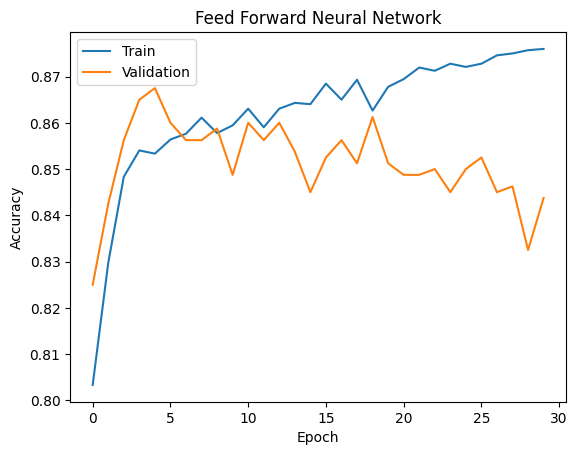

In [50]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Feed Forward Neural Network')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [51]:
y_pred_FNN = FNN.predict(x_test)
y_pred_FNN = np.argmax(y_pred_FNN, axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [52]:
print(classification_report(y_test, y_pred_FNN))
accuracy_FNN = accuracy_score(y_test, y_pred_FNN)

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.71      0.49      0.58       393

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



#**Áp dụng các kĩ thuật tối ưu hóa**

In [53]:
from sklearn.model_selection import  GridSearchCV

##**LogisticRegression**

In [54]:
log_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Khởi tạo và huấn luyện GridSearchCV
Logistic_reg_v2 = GridSearchCV(LogisticRegression(), log_grid, cv=5, scoring='accuracy', n_jobs=-1)
Logistic_reg_v2.fit(x_train, y_train)
# Dự đoán và đánh giá
y_pred_log_v2 = Logistic_reg_v2.predict(x_test)

In [55]:
print("Best parameters found: ", Logistic_reg_v2.best_params_)
print("Best accuracy score: ", Logistic_reg_v2.best_score_)

Best parameters found:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy score:  0.811375


In [56]:
print("\nTraining Accuracy :", Logistic_reg_v2.score(x_train, y_train))
print("Testing Accuaracy :", Logistic_reg_v2.score(x_test, y_test))


Training Accuracy : 0.8125
Testing Accuaracy : 0.8145


##**K-Nearest Neighbors**


In [57]:
best_k = None
best_accuracy = 0

for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
knn_v2 = KNeighborsClassifier(n_neighbors=best_k)
knn_v2.fit(x_train, y_train)
y_pred_knn_v2 = knn_v2.predict(x_test)


In [58]:
print('Best k =', best_k)
print("Training Accuracy :", knn_v2.score(x_train, y_train))
print("Testing Accuaracy :", knn_v2.score(x_test, y_test))

Best k = 8
Training Accuracy : 0.840125
Testing Accuaracy : 0.8275


##**DecisionTree**


In [59]:
tree_v2 = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features=None
)
tree_v2.fit(x_train, y_train)
y_pred_tree_v2 = tree_v2.predict(x_test)

In [60]:
print("Training Accuracy :", tree_v2.score(x_train, y_train))
print("Testing Accuaracy :", tree_v2.score(x_test, y_test))

Training Accuracy : 0.8455
Testing Accuaracy : 0.8485


##**RandomForestClassifier**


In [61]:
rf_v2 = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=2, random_state=42).fit(x_train, y_train)
y_pred_rf_v2 = rf_v2.predict(x_test)

In [62]:
print("Training Accuracy :", rf_v2.score(x_train, y_train))
print("Testing Accuaracy :", rf_v2.score(x_test, y_test))

Training Accuracy : 0.870125
Testing Accuaracy : 0.859


## Đánh giá

In [63]:
print("LogisticRegression:")
print(classification_report(y_test, y_pred_log_v2))
accuracy_log_v2 = accuracy_score(y_test, y_pred_log_v2)

print("\nK-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn_v2))
accuracy_knn_v2 = accuracy_score(y_test, y_pred_knn_v2)

print("\nDecisionTree")
print(classification_report(y_test, y_pred_tree_v2))
accuracy_tree_v2 = accuracy_score(y_test, y_pred_tree_v2)

print("\Random Forest")
print(classification_report(y_test, y_pred_rf_v2))
accuracy_rf_v2 = accuracy_score(y_test, y_pred_rf_v2)

LogisticRegression:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.59      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1607
           1       0.70      0.22      0.33       393

    accuracy                           0.83      2000
   macro avg       0.77      0.60      0.62      2000
weighted avg       0.81      0.83      0.79      2000


DecisionTree
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1607
           1       0.68      0.43      0.53       393

    accuracy                           0.85      2000
   macro avg       0.78      0.69      0.72      2000
weighted avg      

##**Feed Forward Neural Network (FNN)**
- Dropout is a regularization technique where randomly selected neurons are ignored during training. It helps prevent overfitting.

In [64]:
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dropout


In [65]:
adam = Adam(learning_rate=5e-4)

In [66]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                                patience=3,
                                verbose=1,
                                factor=0.2,
                                min_lr=1e-6)

In [67]:

FNN_v2 = Sequential()
FNN_v2.add(Dense(256, activation='relu'))
FNN_v2.add(Dropout(0.5))
FNN_v2.add(Dense(128, activation='relu'))
FNN_v2.add(Dense(64, activation='relu'))
FNN_v2.add(Dense(32, activation='relu'))
FNN_v2.add(Dense(16, activation='relu'))
FNN_v2.add(Dense(8, activation='relu'))
FNN_v2.add(Dense(4, activation='relu'))
FNN_v2.add(Dense(2, activation='softmax'))

FNN_v2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
hist = FNN_v2.fit(x_train, y_train_NN, epochs=30, batch_size=10, validation_split=0.1,  callbacks=[reduce_lr])

y_pred_FNN = FNN_v2.predict(x_test)
y_pred_FNN = np.argmax(y_pred_FNN, axis=1)

Epoch 1/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.7752 - loss: 0.5612 - val_accuracy: 0.8037 - val_loss: 0.4233 - learning_rate: 5.0000e-04
Epoch 2/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7907 - loss: 0.4628 - val_accuracy: 0.8037 - val_loss: 0.4468 - learning_rate: 5.0000e-04
Epoch 3/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7995 - loss: 0.4412 - val_accuracy: 0.8037 - val_loss: 0.3975 - learning_rate: 5.0000e-04
Epoch 4/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7962 - loss: 0.4246 - val_accuracy: 0.8475 - val_loss: 0.3813 - learning_rate: 5.0000e-04
Epoch 5/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8303 - loss: 0.4050 - val_accuracy: 0.8525 - val_loss: 0.3766 - learning_rate: 5.0000e-04
Epoch 6/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8347 - loss: 0.3999 - val_accuracy: 0.8562 - val_loss: 0.3499 - learning_rate: 5.0000e-04
Epoch 7/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy:

In [68]:
print("Feed Forward Neural Network:")
print(classification_report(y_test, y_pred_FNN))
accuracy_FNN = accuracy_score(y_test, y_pred_FNN)

Feed Forward Neural Network:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000



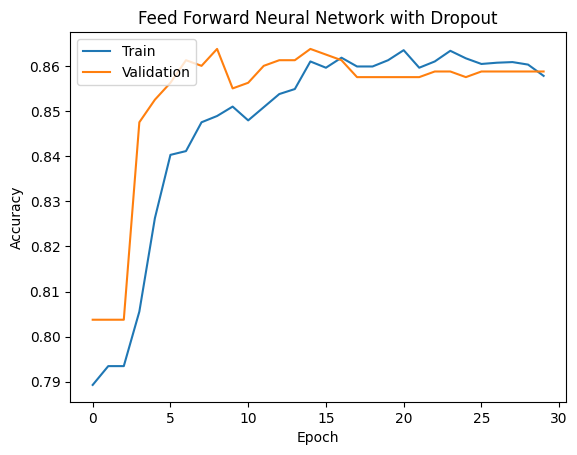

In [69]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Feed Forward Neural Network with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Sau khi huấn luyện xong mô hình, cải thiện độ chính xác
Để cải thiện độ chính xác của mô hình học máy sau khi huấn luyện xong, ta có thể thực hiện một số cách sau:

- Tăng kích thước dữ liệu huấn luyện: Mô hình càng được huấn luyện trên nhiều dữ liệu thì càng có khả năng học được các mối quan hệ phức tạp và chính xác hơn. Tuy nhiên, việc thu thập dữ liệu huấn luyện có thể tốn kém và mất thời gian.

- Chọn thuật toán học máy phù hợp: Mỗi thuật toán học máy có những ưu điểm và nhược điểm riêng. Việc lựa chọn thuật toán phù hợp với bài toán cụ thể sẽ giúp cải thiện độ chính xác của mô hình.

- Tối ưu tham số của mô hình: Các tham số của mô hình là những giá trị quyết định cách thức hoạt động của mô hình. Việc tối ưu tham số của mô hình sẽ giúp mô hình đạt được hiệu suất tốt nhất.

- Áp dụng các kỹ thuật Regularization: Regularization là các kỹ thuật giúp giảm thiểu sự quá khớp (overfitting) của mô hình. Sự quá khớp xảy ra khi mô hình học quá nhiều chi tiết của dữ liệu huấn luyện, dẫn đến việc mô hình không thể dự đoán chính xác dữ liệu mới.

- Phân tích các trường hợp sai

Các trường hợp sai của các mô hình là do có một số feature không quan trọng gây nhiễu làm sai lầm cho việc dự đoán, nên cách cải thiện độ chính xác cho các mô hình sử dụng phương pháp feature selection để chọn ra các feature.

In [70]:
name=list(X_scaler.columns)

In [71]:
from sklearn.feature_selection import RFE
selector_RFE = RFE(Logistic_reg, n_features_to_select=8, step=1)
selector_RFE = selector_RFE.fit(x_train, y_train)
selected_features_RFE = [name[i] for i in range(len(selector_RFE.support_)) if selector_RFE.support_[i]]
print("Selected Features: ", selected_features_RFE)


Selected Features:  [0, 1, 3, 4, 6, 8, 10, 12]


In [72]:
x_train_n = x_train.values
x_test_n = x_test.values

In [73]:
selected_indices_RFE = np.where(selector_RFE.support_)[0]
x_train_RFE = x_train_n[:, selected_indices_RFE]
x_test_RFE = x_test_n[:, selected_indices_RFE]

- Sử dụng các feature mới cho huấn luyện mô hình LogisticRegression , FNN và RandomForestClassifier

## LogisticRegression

In [74]:
log_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Khởi tạo và huấn luyện GridSearchCV
Logistic_reg_v3 = GridSearchCV(LogisticRegression(), log_grid, cv=5, scoring='accuracy', n_jobs=-1)
Logistic_reg_v3.fit(x_train_RFE, y_train)
# Dự đoán và đánh giá
y_pred_log_v3 = Logistic_reg_v3.predict(x_test_RFE)

In [75]:

print("LogisticRegression:")
print(classification_report(y_test, y_pred_log))
accuracy_log_v3 = accuracy_score(y_test, y_pred_log)

LogisticRegression:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.19      0.29       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



## RandomForestClassifier


In [76]:
rf_v3 = RandomForestClassifier(n_estimators=10, max_depth=10, min_samples_split=2, random_state=0).fit(x_train_RFE, y_train)
y_pred_rf_v3 = rf_v3.predict(x_test_RFE)
print("RandomForestClassifier:")
print(classification_report(y_test, y_pred_rf_v3))
accuracy_rf_v3 = accuracy_score(y_test, y_pred_rf_v3)

RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



## Feed Forward Neural Network (FNN)

In [79]:
adam = Adam(learning_rate=5e-4)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                                patience=3,
                                verbose=1,
                                factor=0.2,
                                min_lr=1e-6)

FNN_v3 = Sequential()
FNN_v3.add(Dense(256, activation='relu'))
FNN_v3.add(Dropout(0.5))
FNN_v3.add(Dense(128, activation='relu'))
FNN_v3.add(Dense(64, activation='relu'))
FNN_v3.add(Dense(32, activation='relu'))
FNN_v3.add(Dense(16, activation='relu'))
FNN_v3.add(Dense(8, activation='relu'))
FNN_v3.add(Dense(4, activation='relu'))
FNN_v3.add(Dense(2, activation='softmax'))

FNN_v3.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
hist = FNN_v3.fit(x_train_RFE, y_train_NN, epochs=30, batch_size=10, validation_split=0.1,  callbacks=[reduce_lr])

y_pred_FNN_v3 = FNN_v3.predict(x_test_RFE)
y_pred_FNN_v3 = np.argmax(y_pred_FNN_v3, axis=1)

Epoch 1/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8029 - loss: 0.5012 - val_accuracy: 0.8037 - val_loss: 0.4112 - learning_rate: 5.0000e-04
Epoch 2/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7970 - loss: 0.4368 - val_accuracy: 0.8475 - val_loss: 0.3967 - learning_rate: 5.0000e-04
Epoch 3/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8224 - loss: 0.4209 - val_accuracy: 0.8525 - val_loss: 0.3870 - learning_rate: 5.0000e-04
Epoch 4/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8195 - loss: 0.4268 - val_accuracy: 0.8450 - val_loss: 0.3845 - learning_rate: 5.0000e-04
Epoch 5/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8436 - loss: 0.4005 - val_accuracy: 0.8562 - val_loss: 0.3683 - learning_rate: 5.0000e-04
Epoch 6/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8402 - loss: 0.3981 - val_accuracy: 0.8537 - val_loss: 0.3707 - learning_rate: 5.0000e-04
Epoch 7/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy:

In [81]:
print("Feed Forward Neural Network:")
print(classification_report(y_test, y_pred_FNN_v3))
accuracy_FNN_v3 = accuracy_score(y_test, y_pred_FNN_v3)

Feed Forward Neural Network:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

